In [1]:
# Import the necessary Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv("Life-Expectancy-Data-Updated.csv")
pd.set_option("display.max_columns", None)

In [3]:
# Overview of the dataset
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [4]:
df.shape

(2864, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

# EXPLORATORY DATA ANALYSIS

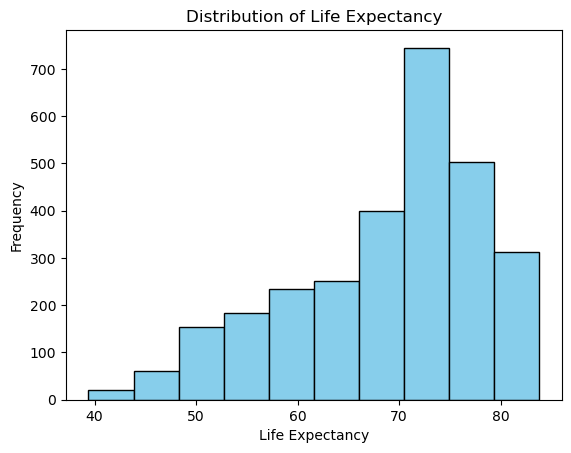

In [6]:
# Create histogram
plt.hist(df["Life_expectancy"], bins=10, color="skyblue", edgecolor="black")

# Set labels and title
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.title("Distribution of Life Expectancy")

# Show plot
plt.show()

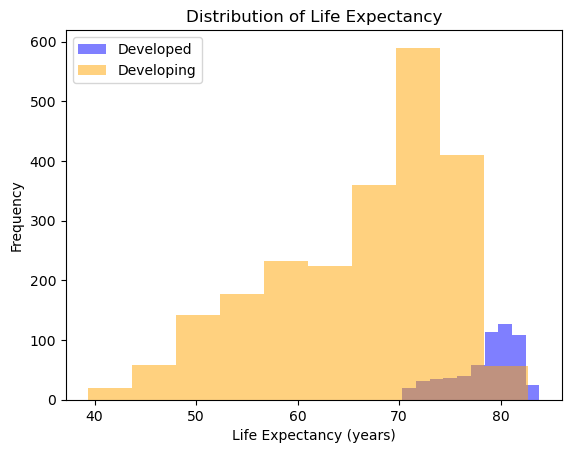

In [7]:
plt.hist(df.loc[df['Economy_status_Developed'] == 1, 'Life_expectancy'], 
          alpha=0.5, label='Developed', bins=10, color='blue')

plt.hist(df.loc[df['Economy_status_Developing'] == 1, 'Life_expectancy'], 
          alpha=0.5, label='Developing', bins=10, color='orange')

plt.xlabel("Life Expectancy (years)")
plt.ylabel("Frequency")
plt.title("Distribution of Life Expectancy")
plt.legend()

plt.show()

# MORE EDA

1. How does Infant and Adult mortality rates affect life expectancy?
2. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
3. What is the impact of schooling on the lifespan of humans?
4. Does Life Expectancy have positive or negative relationship with drinking alcohol?
5. Do densely populated countries tend to have lower life expectancy?
6. What is the impact of Immunization coverage on life Expectancy?

### 1. How does Infant and Adult mortality rates affect Life Expectancy?

correlation between infant_deaths and life expectancy is: -0.9200319194470852


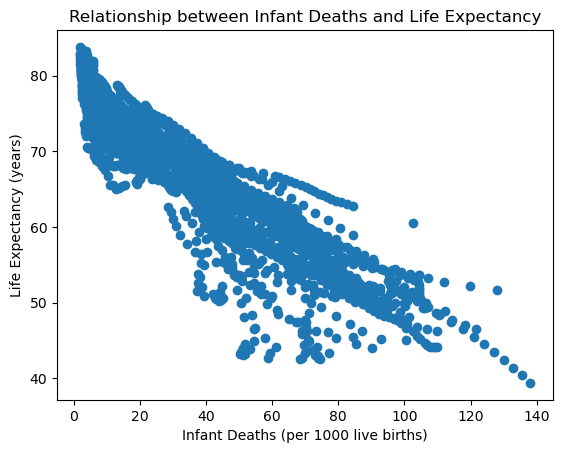

In [8]:
#correlation
infant_correlation = df["Infant_deaths"].corr(df["Life_expectancy"])
print(f"correlation between infant_deaths and life expectancy is: {infant_correlation}")

plt.scatter(df["Infant_deaths"], df["Life_expectancy"]);
plt.xlabel("Infant Deaths (per 1000 live births)")
plt.ylabel("Life Expectancy (years)")
plt.title("Relationship between Infant Deaths and Life Expectancy")
plt.show()

In [9]:
# we see a Strong negative correlation between infant deaths and Life expectancy. this means as infant death increase, Life expectancy reduces.

In [10]:
# Calculate the sum of infant deaths for developed and developing economies
developed_sum = (df['Infant_deaths'] * df['Economy_status_Developed']).sum()
developing_sum = (df['Infant_deaths'] * df['Economy_status_Developing']).sum()

print(f" amount of infant death for developed countries: {developed_sum}")
print(f" amount of infant death for developing countries: {developing_sum:.2f}")

 amount of infant death for developed countries: 2780.1
 amount of infant death for developing countries: 84181.80


In [11]:
# we see that developing coutires have the most infant deaths

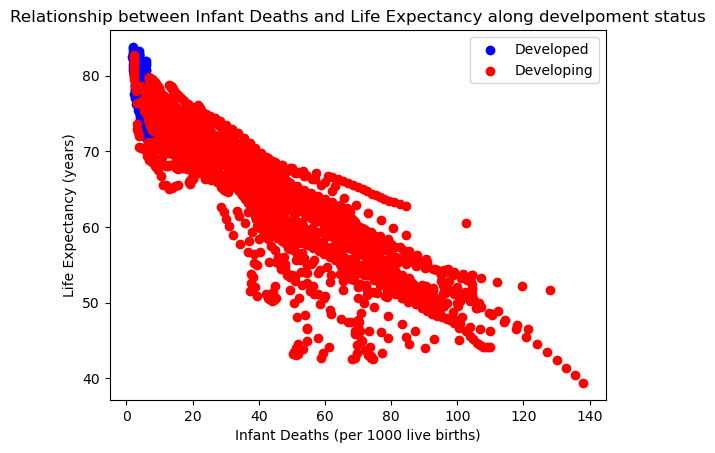

In [12]:
# Create a scatter plot with different colors for developed and developing economies
plt.scatter(df.loc[df['Economy_status_Developed'] == 1, "Infant_deaths"], 
              df.loc[df['Economy_status_Developed'] == 1, "Life_expectancy"], 
              color='blue', label='Developed')

plt.scatter(df.loc[df['Economy_status_Developing'] == 1, "Infant_deaths"], 
              df.loc[df['Economy_status_Developing'] == 1, "Life_expectancy"], 
              color='red', label='Developing')

plt.xlabel("Infant Deaths (per 1000 live births)")
plt.ylabel("Life Expectancy (years)")
plt.title("Relationship between Infant Deaths and Life Expectancy along develpoment status")
plt.legend()
plt.show()

In [13]:
# developed  countries have better life expectancy and lesser infant deaths

correlation between Adult_mortality and life expectancy is: -0.9453603642730645


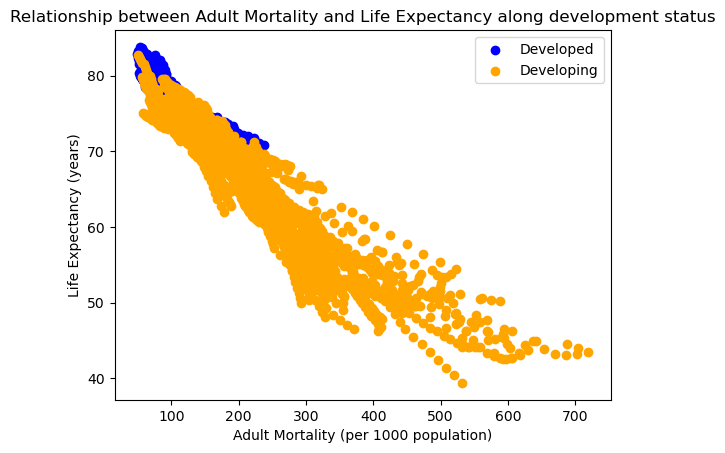

In [14]:
adult_corr = df["Adult_mortality"].corr(df["Life_expectancy"])
print(f"correlation between Adult_mortality and life expectancy is: {adult_corr}")


plt.scatter(df.loc[df['Economy_status_Developed'] == 1, "Adult_mortality"], 
              df.loc[df['Economy_status_Developed'] == 1, "Life_expectancy"], 
              color='blue', label='Developed')

plt.scatter(df.loc[df['Economy_status_Developing'] == 1, "Adult_mortality"], 
              df.loc[df['Economy_status_Developing'] == 1, "Life_expectancy"], 
              color='orange', label='Developing')

plt.xlabel("Adult Mortality (per 1000 population)")
plt.ylabel("Life Expectancy (years)")
plt.title("Relationship between Adult Mortality and Life Expectancy along development status")
plt.legend()
plt.show()

In [15]:
# developed  countries have better life expectancy and lesser Adult Mortality

## 2. What is the impact of schooling on the lifespan of humans?

correlation between schooling and life expectancy is: 0.7324844688915008


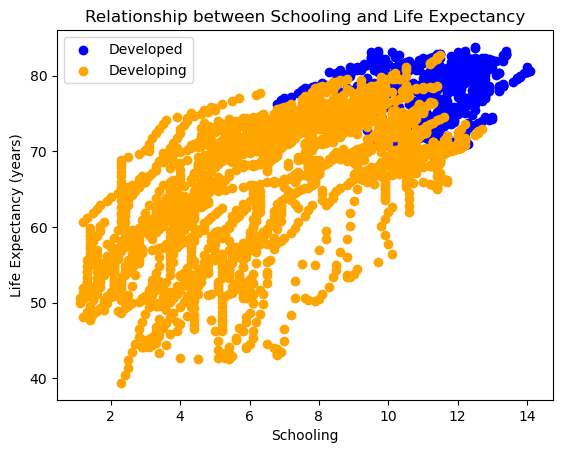

In [16]:
Schooling_correlation = df["Schooling"].corr(df["Life_expectancy"])
print(f"correlation between schooling and life expectancy is: {Schooling_correlation}")

# Create a scatter plot with different colors for developed and developing economies
plt.scatter(df.loc[df['Economy_status_Developed'] == 1, "Schooling"], 
              df.loc[df['Economy_status_Developed'] == 1, "Life_expectancy"], 
              color='blue', label='Developed')

plt.scatter(df.loc[df['Economy_status_Developing'] == 1, "Schooling"], 
              df.loc[df['Economy_status_Developing'] == 1, "Life_expectancy"], 
              color='orange', label='Developing')

plt.xlabel("Schooling")
plt.ylabel("Life Expectancy (years)")
plt.title("Relationship between Schooling and Life Expectancy")
plt.legend()
plt.show()

In [17]:
# theres a positive correlation meaning countries with better schooling rates have better Life expectancy
#Developed countires also do better.

## 3. Does Life Expectancy have positive or negative relationship with drinking alcohol?

correlation between Alcohol_consumption and life expectancy is: 0.3991591075791728


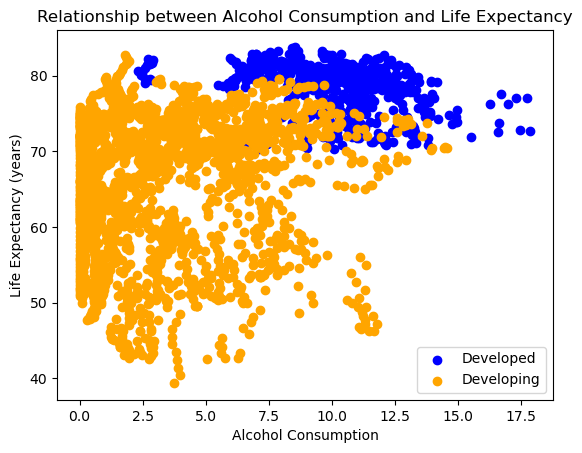

In [18]:
Alcohol_consumption_correlation = df["Alcohol_consumption"].corr(df["Life_expectancy"])
print(f"correlation between Alcohol_consumption and life expectancy is: {Alcohol_consumption_correlation}")


# Create a scatter plot with different colors for developed and developing economies
plt.scatter(df.loc[df['Economy_status_Developed'] == 1, "Alcohol_consumption"], 
              df.loc[df['Economy_status_Developed'] == 1, "Life_expectancy"], 
              color='blue', label='Developed')

plt.scatter(df.loc[df['Economy_status_Developing'] == 1, "Alcohol_consumption"], 
              df.loc[df['Economy_status_Developing'] == 1, "Life_expectancy"], 
              color='orange', label='Developing')

plt.xlabel("Alcohol Consumption")
plt.ylabel("Life Expectancy (years)")
plt.title("Relationship between Alcohol Consumption and Life Expectancy")
plt.legend()
plt.show()

In [19]:
# there isnt any visible corelation between life expectancy and alcohol intake. however,developed countries have better life expectancy. this could be because of beter health care facilits to care for alcohol patients.

## 4. Do densely populated countries tend to have lower life expectancy?

correlation between Population_mln and life expectancy is: 0.026297879724181548


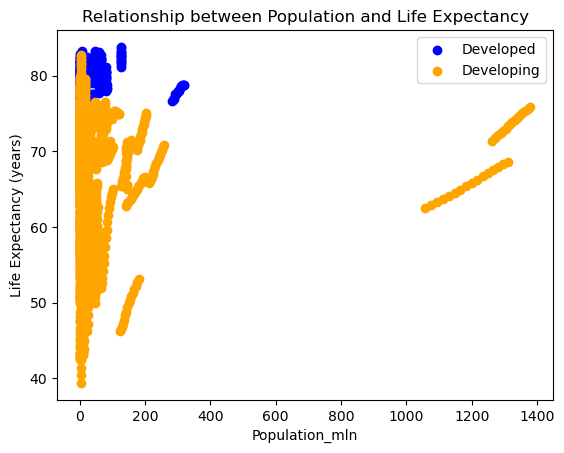

In [20]:
Population_mln_correlation = df["Population_mln"].corr(df["Life_expectancy"])
print(f"correlation between Population_mln and life expectancy is: {Population_mln_correlation}")


# Create a scatter plot with different colors for developed and developing economies
plt.scatter(df.loc[df['Economy_status_Developed'] == 1, "Population_mln"], 
              df.loc[df['Economy_status_Developed'] == 1, "Life_expectancy"], 
              color='blue', label='Developed')

plt.scatter(df.loc[df['Economy_status_Developing'] == 1, "Population_mln"], 
              df.loc[df['Economy_status_Developing'] == 1, "Life_expectancy"], 
              color='orange', label='Developing')

plt.xlabel("Population_mln")
plt.ylabel("Life Expectancy (years)")
plt.title("Relationship between Population and Life Expectancy")
plt.legend()
plt.show()

In [21]:
# no visible correlation and once again, developed countires do have higher expectancy. however there are outliers in developing countires that has relatively high life expectancy

## 5. What is the impact of Immunization coverage on life Expectancy?

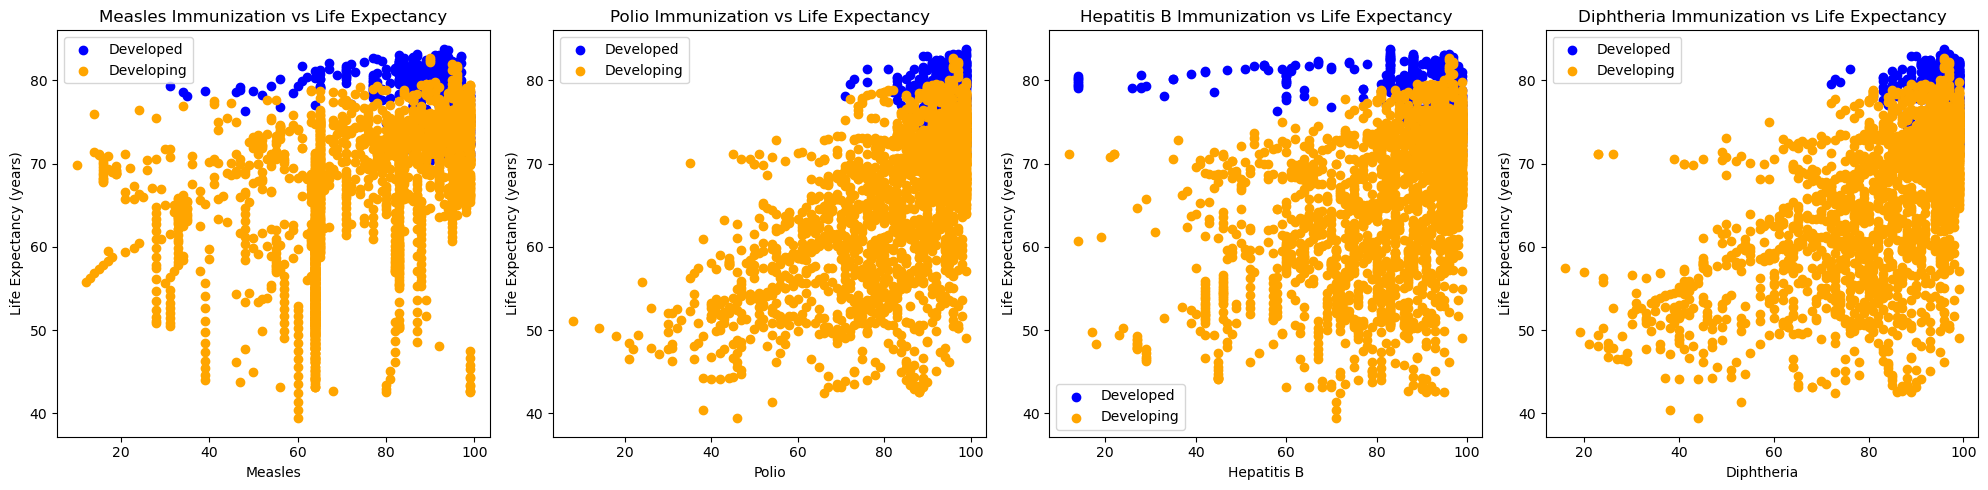

In [22]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Create scatter plots for each disease
axs[0].scatter(df.loc[df['Economy_status_Developed'] == 1, 'Measles'], 
                df.loc[df['Economy_status_Developed'] == 1, 'Life_expectancy'], 
                color='blue', label='Developed')
axs[0].scatter(df.loc[df['Economy_status_Developing'] == 1, 'Measles'], 
                df.loc[df['Economy_status_Developing'] == 1, 'Life_expectancy'], 
                color='orange', label='Developing')
axs[0].set_title('Measles Immunization vs Life Expectancy')
axs[0].set_xlabel('Measles')
axs[0].set_ylabel('Life Expectancy (years)')
axs[0].legend()

axs[1].scatter(df.loc[df['Economy_status_Developed'] == 1, 'Polio'], 
                df.loc[df['Economy_status_Developed'] == 1, 'Life_expectancy'], 
                color='blue', label='Developed')
axs[1].scatter(df.loc[df['Economy_status_Developing'] == 1, 'Polio'], 
                df.loc[df['Economy_status_Developing'] == 1, 'Life_expectancy'], 
                color='orange', label='Developing')
axs[1].set_title('Polio Immunization vs Life Expectancy')
axs[1].set_xlabel('Polio')
axs[1].set_ylabel('Life Expectancy (years)')
axs[1].legend()

axs[2].scatter(df.loc[df['Economy_status_Developed'] == 1, 'Hepatitis_B'], 
                df.loc[df['Economy_status_Developed'] == 1, 'Life_expectancy'], 
                color='blue', label='Developed')
axs[2].scatter(df.loc[df['Economy_status_Developing'] == 1, 'Hepatitis_B'], 
                df.loc[df['Economy_status_Developing'] == 1, 'Life_expectancy'], 
                color='orange', label='Developing')
axs[2].set_title('Hepatitis B Immunization vs Life Expectancy')
axs[2].set_xlabel('Hepatitis B')
axs[2].set_ylabel('Life Expectancy (years)')
axs[2].legend()

axs[3].scatter(df.loc[df['Economy_status_Developed'] == 1, 'Diphtheria'], 
                df.loc[df['Economy_status_Developed'] == 1, 'Life_expectancy'], 
                color='blue', label='Developed')
axs[3].scatter(df.loc[df['Economy_status_Developing'] == 1, 'Diphtheria'], 
                df.loc[df['Economy_status_Developing'] == 1, 'Life_expectancy'], 
                color='orange', label='Developing')
axs[3].set_title('Diphtheria Immunization vs Life Expectancy')
axs[3].set_xlabel('Diphtheria')
axs[3].set_ylabel('Life Expectancy (years)')
axs[3].legend()

# Layout so plots do not overlap
plt.tight_layout()

plt.show()

In [23]:
# no visible correlation in measles and hepatitis B. while moderate positve correlation with Polio and Diphtheria.
# However, we see that Life expectancy is high for developed countires that have low immuization numbers (hepatitis B, measles) while their developing counterparts suffer which could be as aresult of sound healthcare system.

In [24]:
#correlation between immunization and Life expectancy
df[["Measles", "Polio", "Hepatitis_B","Diphtheria"]].corrwith(df["Life_expectancy"])

Measles        0.490019
Polio          0.641217
Hepatitis_B    0.417804
Diphtheria     0.627541
dtype: float64

# LINEAR REGRESSION ASSUMPTIONS

Some Assumptions for Linear Multiple regression i will be looking at
1. Linearity
2. Little/No Mulitcolinearity
3. Outliers
4. Homoscedasticity
5. Normality of Residuals

# 1. Linearity

In [25]:
# We have already seen that Schooling,Polio,Diphtheria,Infant_deaths,Under_five_deaths,Adult_mortality have Linear Relationships with Life Expectancy

Correlation between BMI and Life expectancy: 0.5984233246973868
Correlation between incident HIV and Life expectancy: -0.5530274644851233
Correlation between GDP per capita and Life expectancy: 0.5830897215324403


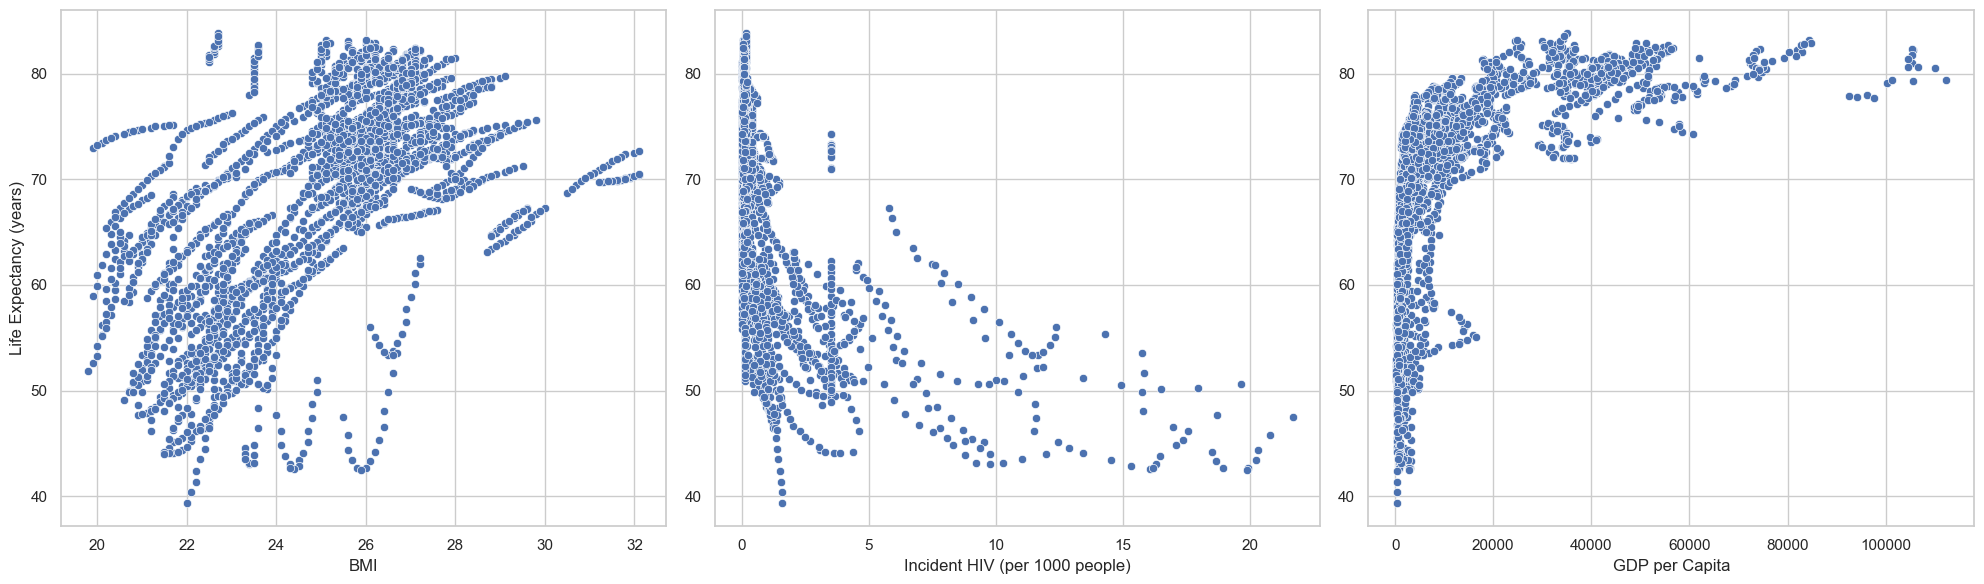

In [26]:
# Calculate correlations
bmi_correlation = df["BMI"].corr(df["Life_expectancy"])
hiv_correlation = df["Incidents_HIV"].corr(df["Life_expectancy"])
gdp_correlation = df["GDP_per_capita"].corr(df["Life_expectancy"])

print(f"Correlation between BMI and Life expectancy: {bmi_correlation}")
print(f"Correlation between incident HIV and Life expectancy: {hiv_correlation}")
print(f"Correlation between GDP per capita and Life expectancy: {gdp_correlation}")

# Create a scatter plot matrix
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(x="BMI", y="Life_expectancy", data=df, ax=axs[0])
axs[0].set_xlabel("BMI")
axs[0].set_ylabel("Life Expectancy (years)")

sns.scatterplot(x="Incidents_HIV", y="Life_expectancy", data=df, ax=axs[1])
axs[1].set_xlabel("Incident HIV (per 1000 people)")
axs[1].set_ylabel("")

sns.scatterplot(x="GDP_per_capita", y="Life_expectancy", data=df, ax=axs[2])
axs[2].set_xlabel("GDP per Capita")
axs[2].set_ylabel("")

plt.tight_layout()
plt.show()

In [27]:
# From the Scatter plots Above, BMI,GDP_per_capita,Incidents_HIV seem more non-linear despite their moderate correlation levels

In [28]:
#correlation between thinness 10-19yrs and life expectancy
Thinness_ten_nineteen_years_corr = df["Thinness_ten_nineteen_years"].corr(df["Life_expectancy"])
#correlation between thinness 5-9yrs and life expectancy
Thinness_five_nine_years_corr = df["Thinness_five_nine_years"].corr(df["Life_expectancy"])

print(f"Thinness_ten_nineteen_years: {Thinness_ten_nineteen_years_corr}")
print(f"Thinness_five_nine_years: {Thinness_five_nine_years_corr}")

Thinness_ten_nineteen_years: -0.4678244950192914
Thinness_five_nine_years: -0.4581662274600834


In [29]:
# we seperate our features from the dataframe
lin_features = df[["Schooling","Diphtheria","Polio","Adult_mortality","Infant_deaths","Under_five_deaths", "Economy_status_Developing","Economy_status_Developed"]]
lin_features.head()

,Schooling,Diphtheria,Polio,Adult_mortality,Infant_deaths,Under_five_deaths,Economy_status_Developing,Economy_status_Developed
0,7.8,97,97,105.8240,11.1,13.0,1,0
1,9.7,97,97,57.9025,2.7,3.3,0,1
2,5.0,64,67,201.0765,51.5,67.9,1,0
3,7.9,93,92,222.1965,32.8,40.5,1,0
4,12.8,94,94,57.9510,3.4,4.3,0,1


# 2. Little to No Multicolinearilty

In [30]:
# Calculate correlation between features
corr_matrix = df[["Schooling","Diphtheria","Polio","Adult_mortality","Infant_deaths","Under_five_deaths"]].corr()
corr_matrix

,Schooling,Diphtheria,Polio,Adult_mortality,Infant_deaths,Under_five_deaths
Schooling,1.000000,0.535621,0.552765,-0.581035,-0.788513,-0.773196
Diphtheria,0.535621,1.000000,0.953178,-0.513803,-0.721875,-0.725355
Polio,0.552765,0.953178,1.000000,-0.524226,-0.740790,-0.742983
Adult_mortality,-0.581035,-0.513803,-0.524226,1.000000,0.794661,0.802361
Infant_deaths,-0.788513,-0.721875,-0.740790,0.794661,1.000000,0.985651
Under_five_deaths,-0.773196,-0.725355,-0.742983,0.802361,0.985651,1.000000


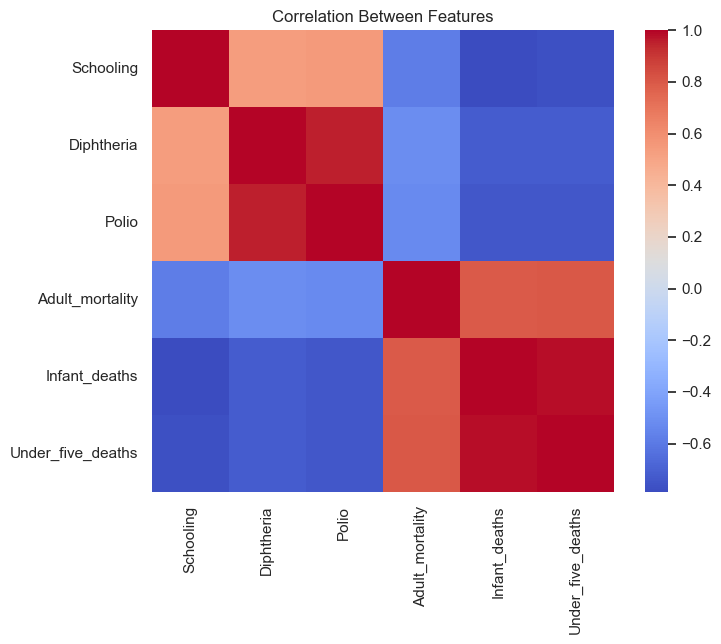

In [31]:
#Visualize the correlation matrix
# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,cmap="coolwarm", square=True);
plt.title("Correlation Between Features")
plt.show();

# 2b Solving Multicolinearity

In [32]:
# Polio and Diphtheria immunization have high positve correlation, this could be because these immunization are mostly administered together to infants.

# Infant deaths and Under_five_deaths have high positive correlation this is because infant deaths is a subset of under 5 deaths

# we'll solve this when we use the ridge (L2 reguralization) method in our model which uses reguralization that adds a penalty term to the loss function (such as Mean absolute error, Mean squared error), and reduces the magnitude of the coefficients

# 3. OUTLIER TREATMENT

In [33]:
# Extract our numerical features
Num_features = df[["Schooling","Diphtheria","Polio","Adult_mortality","Infant_deaths","Under_five_deaths"]]

In [34]:
# different methods of solving Outliers, we will use points greater than and less than 1.5 * IQR as our Outliers
# Detect outliers using IQR
Q1 = Num_features.quantile(0.25)
Q3 = Num_features.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (Num_features < lower_bound) | (Num_features > upper_bound)

In [35]:
# Clip the outliers values to the lower and upperbound values
Num_features = Num_features.clip(lower_bound, upper_bound, axis=1)

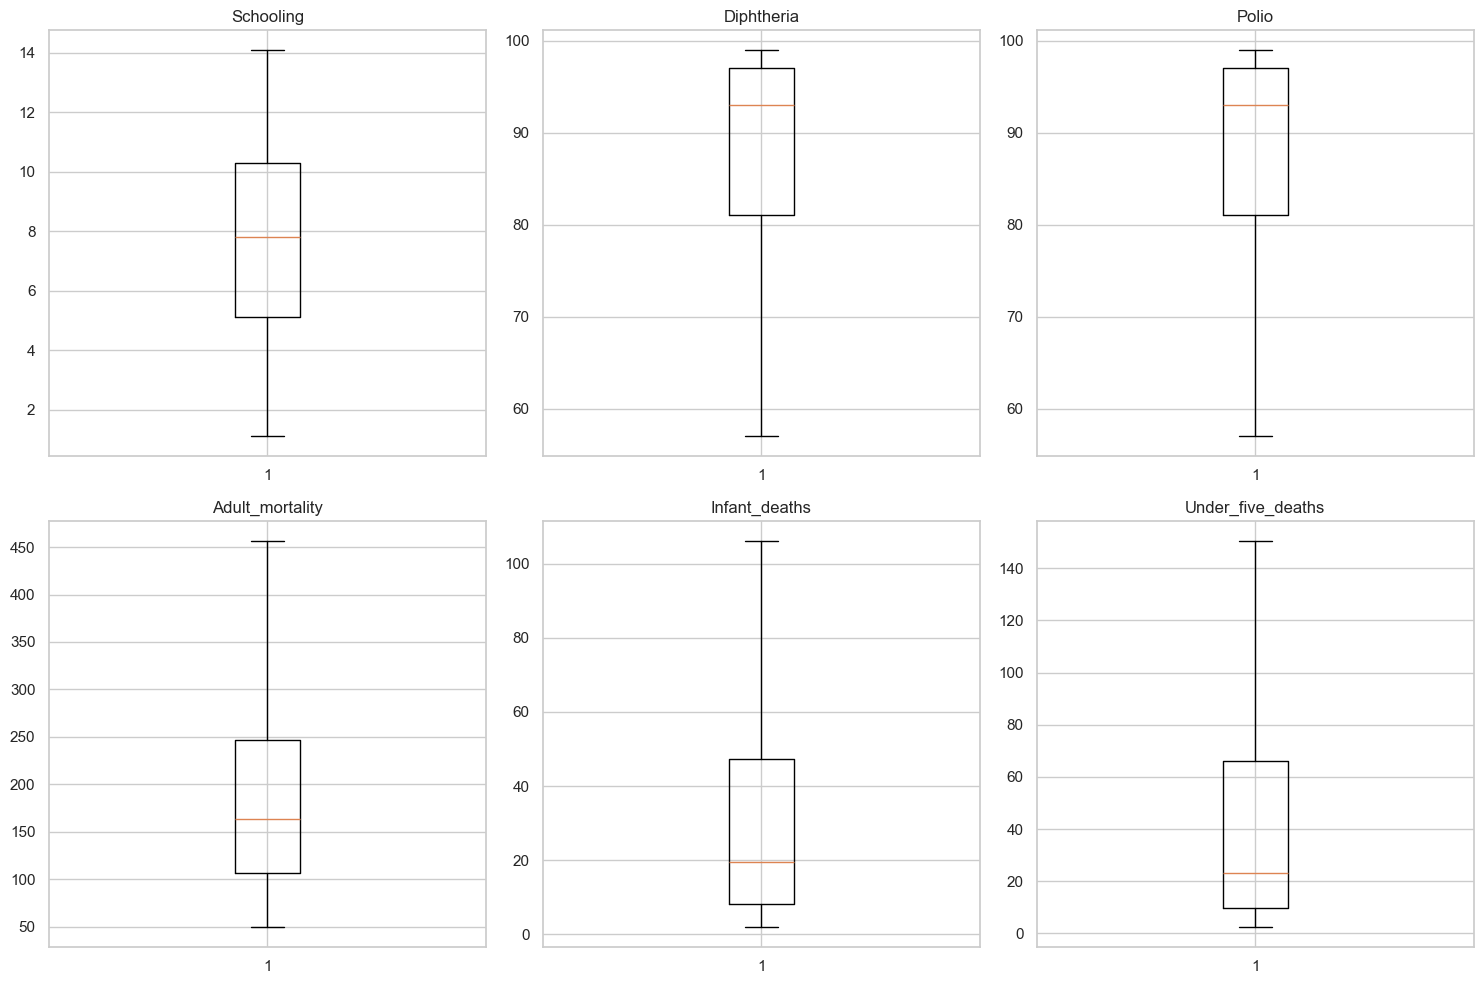

In [36]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Create a boxplot for each feature to check if we stil have outliers
for i, feature in enumerate(Num_features.columns):
    axs[i // 3, i % 3].boxplot(Num_features[feature])
    axs[i // 3, i % 3].set_title(feature)

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

### Define our X and y variables

In [37]:
#EXTRACT OUR CATEGORICAL FEATURES TO LATER JOIN WITH OUR NUMERICAL FEATURES
cat_feat = lin_features[['Economy_status_Developed', 'Economy_status_Developing']]

# DEFINE OUR X FEATURE MATRIX
X = pd.concat([Num_features,cat_feat], axis = 1)
# DEFINE OUR TARGET VARIABLE Y
y = df[['Life_expectancy']]

### Split the data into training, validation and test sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 2291
Testing set size: 573


In [39]:
# validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_train,y_train, test_size =0.2, random_state=42
)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))

Training set size: 1832
Validation set size: 459


### Building baseline and then Model

In [40]:
# we will use the mean of y_train, together with the mean absolute error as our baseline, Our baseline is a reference point that helps us measure the performance of our model.
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)

In [41]:
print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

Baseline MAE: 7.774041780286415


In [42]:
#create our model using the Ridge Regression within the make pipline function
model = make_pipeline(
    Ridge()
)
#fit our data to the model
model.fit(X_train, y_train)

Pipeline(steps=[('ridge', Ridge())])

In [43]:
#Use our Model On our X_train Data
y_pred_training = model.predict(X_train)

In [44]:
#Check the mean absolute error of our prediction training

mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 1.13


In [45]:
# we see that our model performs better than our Baseline

In [46]:
# further metrics for the training data
r2_train = r2_score(y_train, y_pred_training)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_training))
print(f"R-squared (R²) for train data: {r2_train:.4}")
print(f"rmse for train data: {rmse_train:.4}")

R-squared (R²) for train data: 0.9759
rmse for train data: 1.472


In [47]:
y_val_pred = model.predict(X_val)
mae_validation = mean_absolute_error(y_val, y_val_pred)
print("Validation MAE:", round(mae_validation, 2))

Validation MAE: 1.09


In [48]:
#further metric for the validation data
r2_validation = r2_score(y_val, y_val_pred)
rmse_validation = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"R-squared (R²) for validation data: {r2_validation:.4}")
print(f"rmse for validation data: {rmse_validation:.4}")

R-squared (R²) for validation data: 0.9776
rmse for validation data: 1.416


# 4. Homoscedasticity

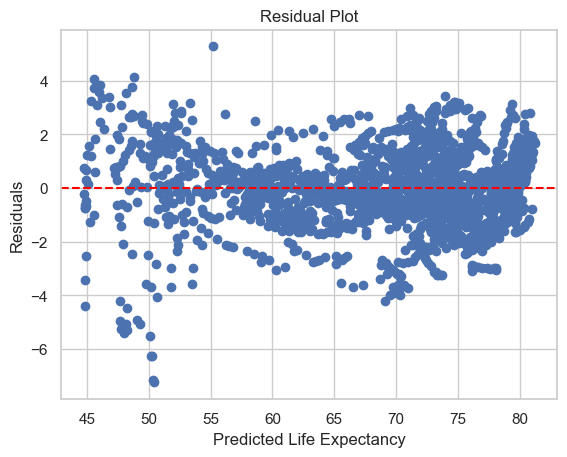

In [49]:
# residual plot to visualise the residuals.
residuals = y_train - y_pred_training
plt.scatter(y_pred_training, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Life Expectancy")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 5. Normality of Residuals

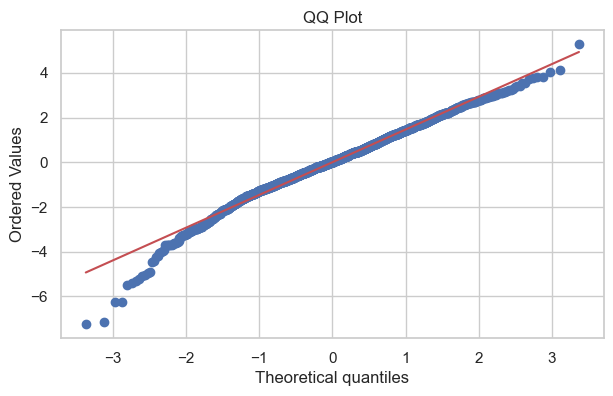

In [50]:
# Create QQ plot
plt.figure(figsize=(7, 4))
residuals = residuals.values.flatten()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot")

plt.show()

## Now we check with our test data, to see if our model can generalize better

In [51]:
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Testing MAE:", round(mae_test, 2))

Testing MAE: 1.19


In [52]:
#checking R-squared
r2 = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"R-squared (R²): {r2:.4f}")
print(f"rmse for test data: {rmse_test:.4f}")

R-squared (R²): 0.9708
rmse for test data: 1.5557


In [53]:
# even though our mean absolute error of our test data is a bit worse than our training data, its ok because this is unseen data. and our model still does better way betteer than our baseline

In [54]:
# the bias or intercept
intercept = model.named_steps["ridge"].intercept_[0]
print(f"y intercept is {intercept:.2f}")

y intercept is 82.60


In [55]:
#coefficients of the feature matrix
coefficients = model.named_steps["ridge"].coef_
feature_names = X_train.columns

# Create a Pandas series with coefficients and feature names
coeff_series = pd.Series(coefficients[0], index=feature_names)

# Print the coefficients with feature names
print(coeff_series)

Schooling                    0.099619
Diphtheria                   0.026323
Polio                       -0.032246
Adult_mortality             -0.052377
Infant_deaths               -0.017552
Under_five_deaths           -0.073908
Economy_status_Developed     0.797932
Economy_status_Developing   -0.797932
dtype: float64


In [56]:
# Checking our model
def predictions(school, Diphtheria, Polio, Adult_mortality, Infant_deaths, Under_five_deaths, Economy_status_Developed, Economy_status_Developing):
    data = {
        'Schooling': school,
        'Diphtheria': Diphtheria,
        'Polio': Polio,
        'Adult_mortality': Adult_mortality,
        'Infant_deaths': Infant_deaths,
        'Under_five_deaths': Under_five_deaths,
        'Economy_status_Developed': Economy_status_Developed,
        'Economy_status_Developing': Economy_status_Developing
    }
    # turn the data to a dataframe
    df = pd.DataFrame(data, index=[0]) 
    
    # Make a prediction using the data
    prediction = model.predict(df)
    return f"Predicted life expectancy: {prediction[0][0]:.0f} years"

In [57]:
predictions(7.8,97,97,105.8240,11.1,13.0,0,1)

'Predicted life expectancy: 75 years'